### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. 
* Would you accept that coupon and take a short detour to the restaurant?
* Would you accept the coupon but use it on a subsequent trip?
* Would you ignore the coupon entirely?
* What if the coupon was for a bar instead of a restaurant?
* What about a coffee house?
* Would you accept a bar coupon with a minor passenger in the car?
* What about if it was just you and your partner in the car?
* Would weather impact the rate of acceptance?
* What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under 20), coffee houses, carry out & take away, bar, and more expensive restaurants (20 - 50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  



#### STEP 1 - Load and Review Data

Read in and perform initial of review the `coupons.csv` file.


In [2]:
data = pd.read_csv('data/coupons.csv')

## print sample rows
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
## print the dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [14]:
## print valid values for the non-numeric columns
## allows to check for typos, etc. in the raw data

non_numeric_columns = data.select_dtypes(include='object').columns

for col in non_numeric_columns:
        print(col, data[col].unique())
        print(" ")


destination ['No Urgent Place' 'Home' 'Work']
 
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
 
weather ['Sunny' 'Rainy' 'Snowy']
 
time ['2PM' '10AM' '6PM' '7AM' '10PM']
 
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
 
expiration ['1d' '2h']
 
gender ['Female' 'Male']
 
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
 
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
 
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
 
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrati

**Key Observations**

* Time of day
    * Instructions indicate that time data will be: Time: 10AM, 2PM, or 6PM
    * However, there are 5 different times observed in the data set: time \[2PM' '10AM' '6PM' '7AM' '10PM']


* Marital Status
    * Instructions indicate single, married partner, unmarried partner, or widowed
    * However, the data also includes Divorced as one of the valid values:
        * \['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
     
* Education
    * Instructions call out data as: high school, bachelors degree, associates degree, or graduate degree
    * However, actual data has finer gradations (high school graduate vs not, and some college vs degree):
        * \['Some college - no degree' 'Bachelors degree' 'Associates degree' 'High School Graduate' 'Graduate degree (Masters or Doctorate)' 'Some High School']
  


#### STEP 2 - Remove/Clean up Data Problems

Perform clean up on missing or problematic data

In [4]:
## Review missing data points
null_values = data.isnull().sum()
print(null_values)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


**Key Observations**

Drop the car column, since a large portion of the data is missing

In [15]:
## drop car column, most data missing
data = data.drop(labels=('car'), axis=1)


In [16]:
# Add response label column

data['Response'] = " "
data.loc[data['Y'] == 0, 'Response'] = 'Rejected' 
data.loc[data['Y'] == 1, 'Response'] = 'Accepted' 

#### STEP 3 - Visualize (Pie and Bar chart) drivers who accepted

Visualize the proportion of the total observations chose to accept the coupon


In [17]:
## Calculate the overall Response Reject/Accept into a dataframe
pie_response = data.groupby('Response')[['Response']].value_counts().to_frame()

pie_response


,count
Response,
Accepted,7210
Rejected,5474


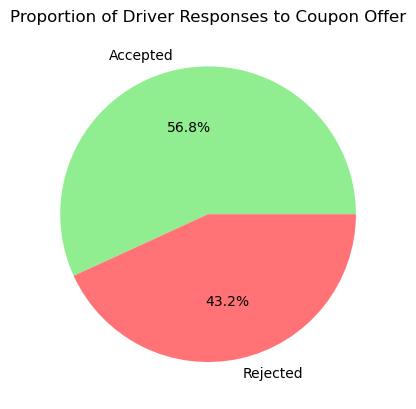

<Figure size 640x480 with 0 Axes>

In [18]:
## Plot overall response rate as a pie chart

red_color = '#FF7276'
green_color = '#90EE90'
plt.pie(pie_response['count'], labels = pie_response.index, autopct='%.1f%%', colors = (green_color, red_color))
plt.title('Proportion of Driver Responses to Coupon Offer')
plt.show()
plt.savefig('images/pie_allcoupons.png')

5. Use a bar plot to visualize the `coupon` column.

In [19]:
## group responses by coupon type
bar_response = data.groupby('coupon')[['Response']].value_counts().to_frame().reset_index()

bar_response.head()

,coupon,Response,count
0,Bar,Rejected,1190
1,Bar,Accepted,827
2,Carry out & Take away,Accepted,1760
3,Carry out & Take away,Rejected,633
4,Coffee House,Rejected,2001


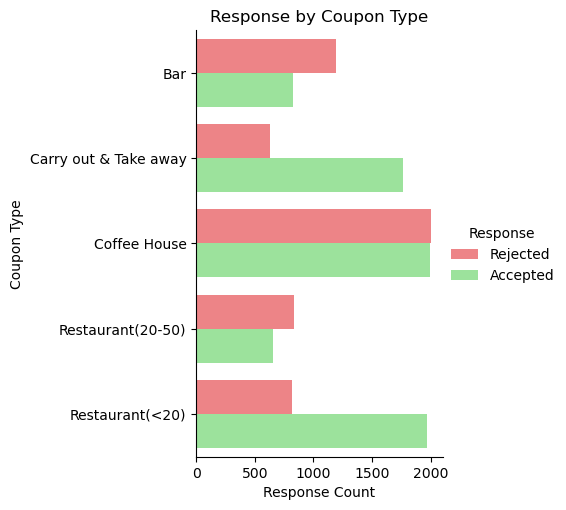

<Figure size 640x480 with 0 Axes>

In [20]:
## Plot response by coupon type as a bar chart

sns.catplot(data=bar_response, kind='bar',
            y='coupon', x='count', hue='Response',
            palette={'Rejected':red_color, 'Accepted':green_color}
           )
plt.title('Response by Coupon Type')
plt.xlabel('Response Count')
plt.ylabel('Coupon Type')
plt.show()
plt.savefig('images/bar_allcoupons.png')

#### STEP 4 - Visualize (histogram) response segmented by temperature

Use a histogram to visualize the temperature column.

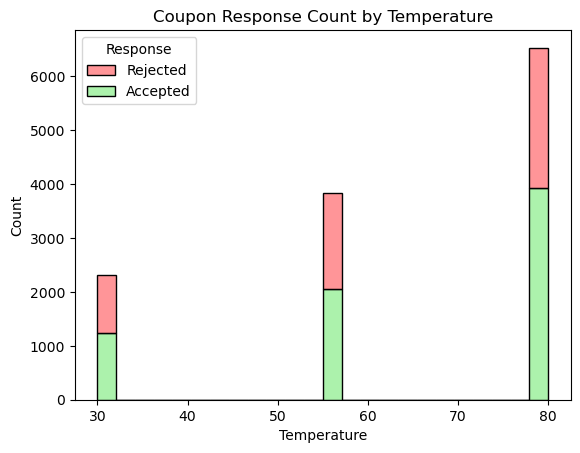

In [21]:
temp_data = pd.DataFrame(data[['temperature','Response']])

## Update column names
temp_data.columns = ['Temperature','Response']

## Plot histogram
sns.histplot(data=temp_data, x='Temperature', hue='Response', hue_order=['Rejected','Accepted'], multiple='stack', palette=[ red_color,green_color])
plt.title("Coupon Response Count by Temperature")
plt.show()


### Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

#### STEP 1 - Create new Dataframe

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
## copy the data for only cases where the coupon is for a bar
data_bar = data[data.coupon == 'Bar'].copy()
print(data_bar.shape)

## drop cases where we don't know frequency of bar attendence
data_bar.dropna(subset=['Bar'], inplace=True)
print(data_bar.shape)


(2017, 26)
(1996, 26)


#### STEP 2 - Determine overall acceptance rate

2. What proportion of bar coupons were accepted?

FINDINGS:
* Acceptance of the bar coupon was 41%, which is lower than the overall average for all coupon types, which was 56.8%.

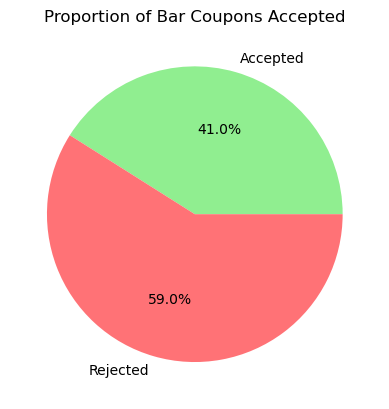

In [23]:
bar_response = data_bar.groupby('Response')[['Response']].value_counts().to_frame()

plt.pie(bar_response['count'], labels = bar_response.index, autopct='%.1f%%', colors = (green_color,red_color))
plt.title('Proportion of Bar Coupons Accepted')
plt.show()

#### STEP 3 - Compare acceptance by frequency of use

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

FINDINGS:
* Prior usage appears to be positively correlated, as those who frequent 3x or more per month accept 77% of the time
* But, those attending bars less frequently 37.1%

This finding would indicate the coupons are of greater interest to drivers who are already customers of this kind of establishment (bar in this case).


In [24]:
data_bar['Bar_frequency'] = " "
data_bar.loc[data_bar['Bar'] == '1~3', 'Bar_frequency'] = 'less_than_3'
data_bar.loc[data_bar['Bar'] == 'less1', 'Bar_frequency'] = 'less_than_3'
data_bar.loc[data_bar['Bar'] == 'never', 'Bar_frequency'] = 'less_than_3'
data_bar.loc[data_bar['Bar_frequency'] != 'less_than_3', 'Bar_frequency'] = 'more_than_3'
print(data_bar.shape)

bar_lessthan3 = data_bar.groupby(['Bar_frequency'])[['Response']].value_counts().to_frame().reset_index()

bar_lessthan3

(1996, 27)


,Bar_frequency,Response,count
0,less_than_3,Rejected,1131
1,less_than_3,Accepted,666
2,more_than_3,Accepted,153
3,more_than_3,Rejected,46


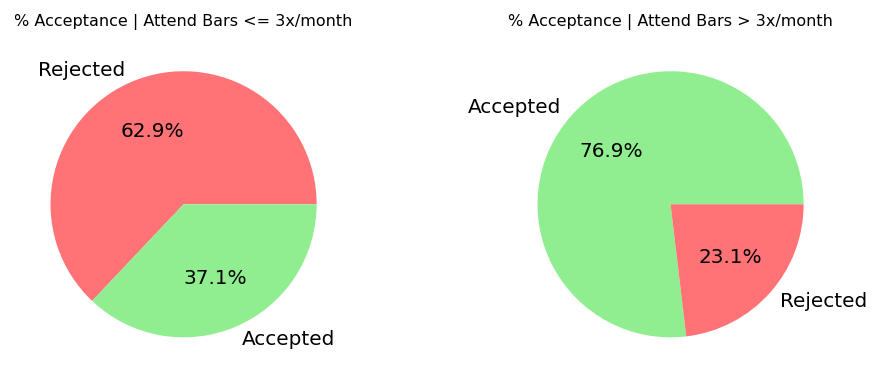

In [25]:

# Print pie charts to compare acceptance rates

fig = plt.figure(figsize=(8,3),dpi=144)
ax1 = fig.add_subplot(121)

ax1.pie(bar_lessthan3.loc[bar_lessthan3['Bar_frequency'] == 'less_than_3', 'count'], 
        labels = bar_lessthan3.loc[bar_lessthan3['Bar_frequency'] == 'less_than_3', 'Response'], 
        autopct='%.1f%%', 
        colors = (red_color, green_color))
ax1.set_title("% Acceptance | Attend Bars <= 3x/month", fontsize=8)

ax2 = fig.add_subplot(122)
ax2.pie(bar_lessthan3.loc[bar_lessthan3['Bar_frequency'] == 'more_than_3', 'count'], 
        labels = bar_lessthan3.loc[bar_lessthan3['Bar_frequency'] == 'more_than_3', 'Response'], 
        autopct='%.1f%%', 
        colors = (green_color,red_color))
ax2.set_title("% Acceptance | Attend Bars > 3x/month", fontsize=8)

plt.show()

#### STEP 4 - Compare impact of age

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

FINDINGS:
* Age appears to be positively correlated, as those over 25 accept nearly 70% of the time
* But, those under 25, only 33.4%

This makes some intuitional sense, as the under 25 age category also includes drivers who are not yet of drinking age and therefore would be less interested in bar coupons.


In [26]:

bar_more1 = ['1~3','4~8', 'gt8']
age_over25 = ['46', '26', '31', '41', '50plus', '36']

# Add boolean column to group by
data_bar['Over25andMore1xMonth'] = 0
data_bar.loc[data_bar['Bar'].isin(bar_more1) & data_bar['age'].isin(age_over25),['Over25andMore1xMonth']] = 1

# Create grouping table with subtotals
data_Over25Plus1 = data_bar.groupby(['Over25andMore1xMonth'])[['Response']].value_counts().to_frame().reset_index()
data_Over25Plus1


,Over25andMore1xMonth,Response,count
0,0,Rejected,1049
1,0,Accepted,527
2,1,Accepted,292
3,1,Rejected,128


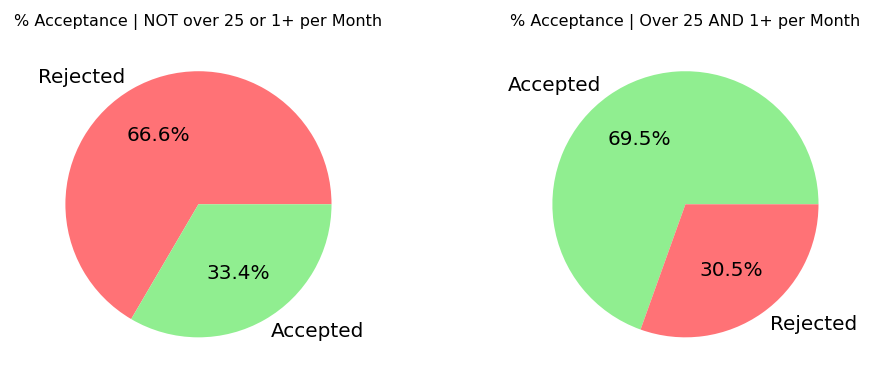

In [27]:

# Print pie charts to compare acceptance rates

fig = plt.figure(figsize=(8,3),dpi=144)
ax1 = fig.add_subplot(121)

ax1.pie(data_Over25Plus1.loc[data_Over25Plus1['Over25andMore1xMonth'] == 0, 'count'], 
        labels = data_Over25Plus1.loc[data_Over25Plus1['Over25andMore1xMonth'] == 0, 'Response'], 
        autopct='%.1f%%', 
        colors = (red_color, green_color))
ax1.set_title("% Acceptance | NOT over 25 or 1+ per Month", fontsize=8)

ax2 = fig.add_subplot(122)
ax2.pie(data_Over25Plus1.loc[data_Over25Plus1['Over25andMore1xMonth'] == 1, 'count'], 
        labels = data_Over25Plus1.loc[data_Over25Plus1['Over25andMore1xMonth'] == 1, 'Response'], 
        autopct='%.1f%%', 
        colors = (green_color,red_color))
ax2.set_title("% Acceptance | Over 25 AND 1+ per Month", fontsize=8)
plt.show()

#### STEP 5 - Compare impact of frequency, passenger type, and occupation

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

FINDINGS:
* Being Alone or with Kids, being a Farmer, or frequenting bars <1 per month appears to be negatively correlated with acceptance.  Such drivers accept only 37.7%
* Whereas, in the opposite consitions, drivers accept 71.8% of the time.


In [28]:

bar_more1 = ['1~3','4~8', 'gt8']
pass_types = ['Friend(s)','Partner']
occ_type = ['Farming Fishing & Forestry']

flag1 = (data_bar['occupation'] !=  'Farming Fishing & Forestry')
flag2 = (data_bar['Bar'].isin(bar_more1))
flag3 = (data_bar['passanger'].isin(pass_types))
data_bar['More1xNoKidsFarming'] = (flag1 & flag2 & flag3)

# Create grouping table with subtotals
data_More1xNoKidsFarming = data_bar.groupby(['More1xNoKidsFarming'])[['Response']].value_counts().to_frame().reset_index()
data_More1xNoKidsFarming



,More1xNoKidsFarming,Response,count
0,False,Rejected,1122
1,False,Accepted,679
2,True,Accepted,140
3,True,Rejected,55


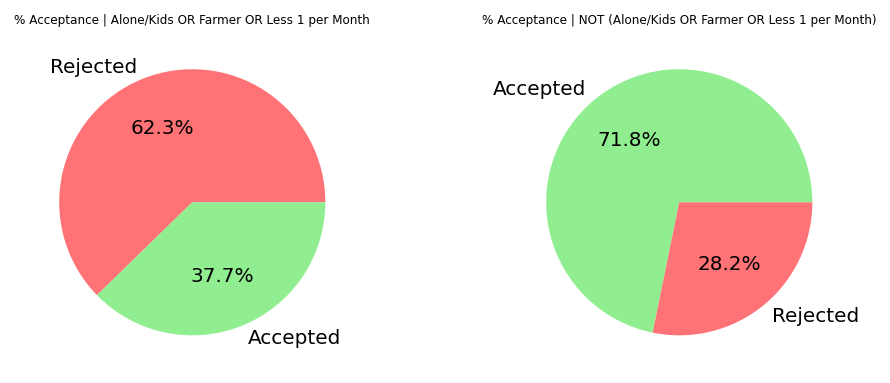

In [29]:

# Print pie charts to compare acceptance rates

fig = plt.figure(figsize=(8,3),dpi=144)
ax1 = fig.add_subplot(121)

ax1.pie(data_More1xNoKidsFarming.loc[data_More1xNoKidsFarming['More1xNoKidsFarming'] == False, 'count'], 
        labels = data_More1xNoKidsFarming.loc[data_More1xNoKidsFarming['More1xNoKidsFarming'] == False, 'Response'], 
        autopct='%.1f%%', 
        colors = (red_color, green_color))
ax1.set_title("% Acceptance | Alone/Kids OR Farmer OR Less 1 per Month", fontsize=6)

ax2 = fig.add_subplot(122)
ax2.pie(data_More1xNoKidsFarming.loc[data_More1xNoKidsFarming['More1xNoKidsFarming'] == True, 'count'], 
        labels = data_More1xNoKidsFarming.loc[data_More1xNoKidsFarming['More1xNoKidsFarming'] == True, 'Response'], 
        autopct='%.1f%%', 
        colors = (green_color,red_color))
ax2.set_title("% Acceptance | NOT (Alone/Kids OR Farmer OR Less 1 per Month)", fontsize=6)
plt.show()

#### STEP 6 - Multiple comparisons

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

FINDINGS:

* In Case 1, for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed accept 71.8% of the time, whereas drivers that fail to meet any of these conditions only accepted 37.7%.

* In Case 2, for drivers who go to bars more than once a month and are under the age of 30, they accept 72.2% of the time, whereas drivers lacking either of these criteria only do so 34.5%

* In Case 3, for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K, the acceptance rate is only 45.7%, whereas drivers lacking either of these criteria accept only slightly less frequently, at 40.1%



In [30]:

bar_more1 = ['1~3','4~8', 'gt8']
pass_not_kid = ['Friend(s)','Partner']
not_widow = ['Unmarried partner','Single', 'Married partner' ,'Divorced']
under30 = ['21' , '26' , 'below21']
income_less50 =  ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499' , 'Less than $12500']
cheapRest_gt4 = ['4~8','gt8']

data_bar['More1xNoKidsNotWidow'] = (data_bar['maritalStatus'].isin(not_widow)) & (data_bar['Bar'].isin(bar_more1)) & (data_bar['passanger'].isin(pass_not_kid))
data_bar['More1xUnder30'] = ((data_bar['Bar'].isin(bar_more1))) & (data_bar['age'].isin(under30))
data_bar['Under50Kcheap4x'] = (data_bar['income'].isin(income_less50)) & (data_bar['RestaurantLessThan20'].isin(cheapRest_gt4))

# Create grouping table with subtotals
data_More1xNoKidsNotWidow = data_bar.groupby(['More1xNoKidsNotWidow'])[['Response']].value_counts().to_frame().reset_index()
data_More1xNoKidsNotWidow



,More1xNoKidsNotWidow,Response,count
0,False,Rejected,1122
1,False,Accepted,679
2,True,Accepted,140
3,True,Rejected,55


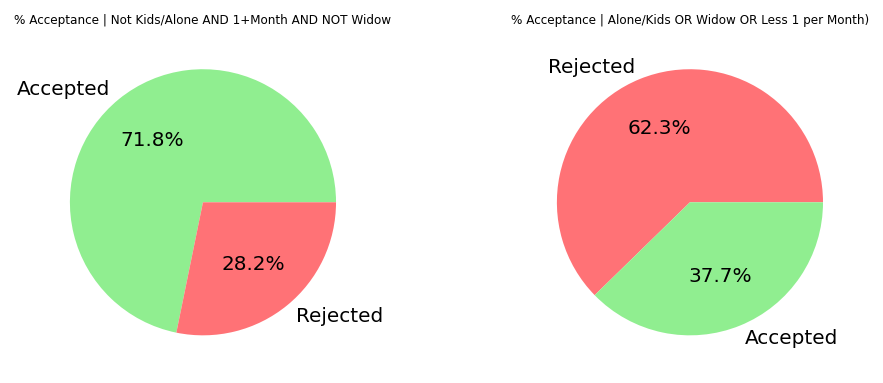

In [31]:

# Print pie charts to compare acceptance rates

fig = plt.figure(figsize=(8,3),dpi=144)
ax1 = fig.add_subplot(121)

ax1.pie(data_More1xNoKidsNotWidow.loc[data_More1xNoKidsNotWidow['More1xNoKidsNotWidow'] == True, 'count'], 
        labels = data_More1xNoKidsNotWidow.loc[data_More1xNoKidsNotWidow['More1xNoKidsNotWidow'] == True, 'Response'], 
        autopct='%.1f%%', 
        colors = ( green_color, red_color))
ax1.set_title("% Acceptance | Not Kids/Alone AND 1+Month AND NOT Widow", fontsize=6)

ax2 = fig.add_subplot(122)
ax2.pie(data_More1xNoKidsNotWidow.loc[data_More1xNoKidsNotWidow['More1xNoKidsNotWidow'] == False, 'count'], 
        labels = data_More1xNoKidsNotWidow.loc[data_More1xNoKidsNotWidow['More1xNoKidsNotWidow'] == False, 'Response'], 
        autopct='%.1f%%', 
        colors = ( red_color,green_color))
ax2.set_title("% Acceptance | Alone/Kids OR Widow OR Less 1 per Month)", fontsize=6)
plt.show()

In [32]:
data_More1xUnder30 = data_bar.groupby(['More1xUnder30'])[['Response']].value_counts().to_frame().reset_index()
data_More1xUnder30



,More1xUnder30,Response,count
0,False,Rejected,1081
1,False,Accepted,570
2,True,Accepted,249
3,True,Rejected,96


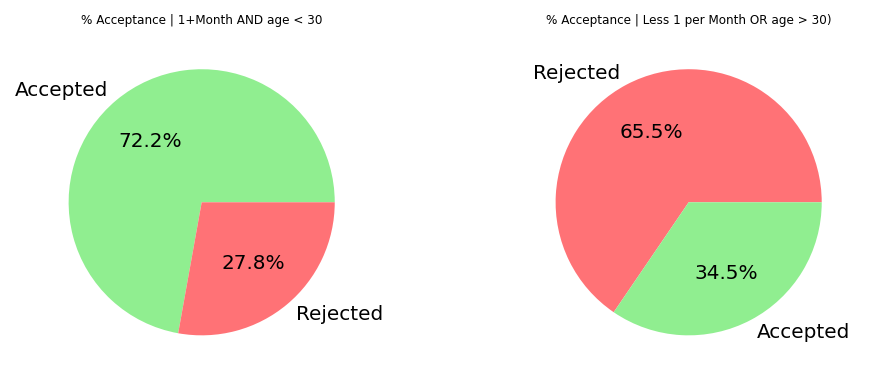

In [33]:

# Print pie charts to compare acceptance rates

fig = plt.figure(figsize=(8,3),dpi=144)
ax1 = fig.add_subplot(121)

ax1.pie(data_More1xUnder30.loc[data_More1xUnder30['More1xUnder30'] == True, 'count'], 
        labels = data_More1xUnder30.loc[data_More1xUnder30['More1xUnder30'] == True, 'Response'], 
        autopct='%.1f%%', 
        colors = ( green_color, red_color))
ax1.set_title("% Acceptance | 1+Month AND age < 30", fontsize=6)

ax2 = fig.add_subplot(122)
ax2.pie(data_More1xUnder30.loc[data_More1xUnder30['More1xUnder30'] == False, 'count'], 
        labels = data_More1xUnder30.loc[data_More1xUnder30['More1xUnder30'] == False, 'Response'], 
        autopct='%.1f%%', 
        colors = (red_color,green_color))
ax2.set_title("% Acceptance | Less 1 per Month OR age > 30)", fontsize=6)
plt.show()


In [34]:
data_Under50Kcheap4x = data_bar.groupby(['Under50Kcheap4x'])[['Response']].value_counts().to_frame().reset_index()
data_Under50Kcheap4x



,Under50Kcheap4x,Response,count
0,False,Rejected,993
1,False,Accepted,664
2,True,Rejected,184
3,True,Accepted,155


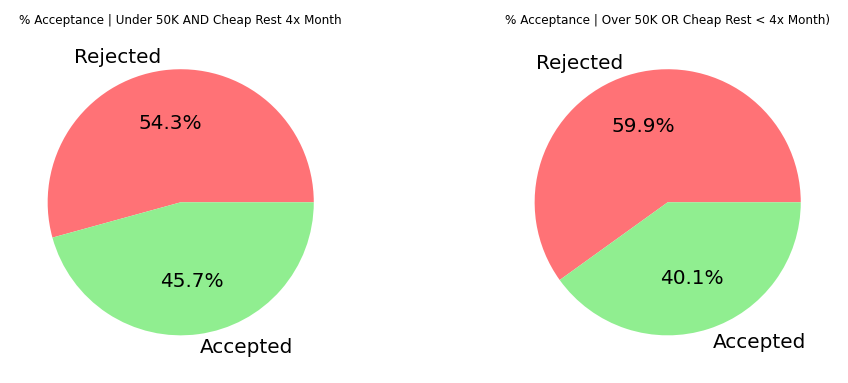

In [35]:

# Print pie charts to compare acceptance rates

fig = plt.figure(figsize=(8,3),dpi=144)
ax1 = fig.add_subplot(121)

ax1.pie(data_Under50Kcheap4x.loc[data_Under50Kcheap4x['Under50Kcheap4x'] == True, 'count'], 
        labels = data_Under50Kcheap4x.loc[data_Under50Kcheap4x['Under50Kcheap4x'] == True, 'Response'], 
        autopct='%.1f%%', 
        colors = ( red_color, green_color))
ax1.set_title("% Acceptance | Under 50K AND Cheap Rest 4x Month", fontsize=6)

ax2 = fig.add_subplot(122)
ax2.pie(data_Under50Kcheap4x.loc[data_Under50Kcheap4x['Under50Kcheap4x'] == False, 'count'], 
        labels = data_Under50Kcheap4x.loc[data_Under50Kcheap4x['Under50Kcheap4x'] == False, 'Response'], 
        autopct='%.1f%%', 
        colors = (red_color,green_color))
ax2.set_title("% Acceptance | Over 50K OR Cheap Rest < 4x Month)", fontsize=6)
plt.show()


#### STEP 7 - Summarize hypothesis

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

FINDINGS:

Primary findings would be that there appears a positive correlation based upon whether the driver is already a frequent customer of bars, as well as if the driver is travelling with an adult passenger.

Both of these match intuition, which is that coupons would be more attractive to clients who already frequent the kind of establishment (bar in this instance) that is being promoted by the coupon.

Secondarily, if the driver has a companion to share the experience with (not a child) then there is greater tendency to accept the offer, since going to a bar tends to be a social experience.

The relationship with age is somewhat less claer as the conditional grouping above didn't necessary separate out drivers who are not yet of drinking age. This attribute would benefit from being analyzed in isolation to the other factors to access its impact on the driver responses.



### Independent Investigation - Coffee House Coupons

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [36]:
## copy the data for only cases where the coupon is for a coffee house
data_coffee = data[data.coupon == 'Coffee House'].copy()

data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null   obje

In [37]:
null_values = data_coffee.isnull().sum()
print(null_values)

destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                     37
CoffeeHouse             72
CarryAway               57
RestaurantLessThan20    50
Restaurant20To50        55
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
direction_opp            0
Y                        0
Response                 0
dtype: int64


In [38]:
## drop cases where we don't know frequency of coffee house attendence
data_coffee.dropna(subset=['CoffeeHouse'], inplace=True)
print(data_coffee.shape)

(3924, 26)


In [39]:
## First create the ordinal order of income
ordinal_order = pd.DataFrame(['Less than $12500' ,'$12500 - $24999' ,'$25000 - $37499' ,'$37500 - $49999' , '$50000 - $62499' ,'$62500 - $74999', '$75000 - $87499',
              '$87500 - $99999','$100000 or More'])
ordinal_order.columns = ['income']
ordinal_order


,income
0,Less than $12500
1,$12500 - $24999
2,$25000 - $37499
3,$37500 - $49999
4,$50000 - $62499
5,$62500 - $74999
6,$75000 - $87499
7,$87500 - $99999
8,$100000 or More


In [40]:
## Find probabilty of acceptance by Income range
income_plotdata = data_coffee.groupby(['income'])[['Y']].mean().reset_index()

## Add ordinal order as a column and sort by it, so goes from low to high
for index, row in ordinal_order.iterrows():
    income_plotdata.loc[income_plotdata['income'] == row['income'],'income_ordinal'] = index 
income_plotdata = income_plotdata.sort_values(by='income_ordinal')
print(income_plotdata)

             income         Y  income_ordinal
8  Less than $12500  0.549342             0.0
1   $12500 - $24999  0.551664             1.0
2   $25000 - $37499  0.472354             2.0
3   $37500 - $49999  0.543103             3.0
4   $50000 - $62499  0.503663             4.0
5   $62500 - $74999  0.435424             5.0
6   $75000 - $87499  0.296610             6.0
7   $87500 - $99999  0.560784             7.0
0   $100000 or More  0.492424             8.0


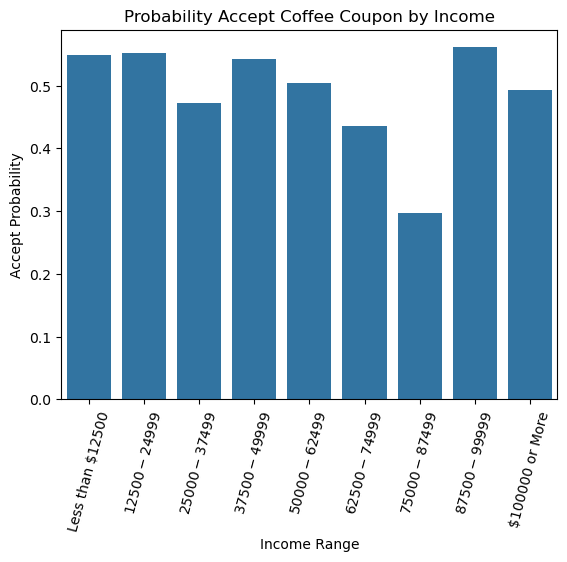

In [41]:
## Create bar plot to show distribution of probabilities

sns.barplot(x='income', y='Y', data=income_plotdata)
plt.title("Probability Accept Coffee Coupon by Income")
plt.xlabel('Income Range')  # X-axis label
plt.ylabel('Accept Probability')  # Y-axis label
plt.xticks(rotation=75)
plt.show()

In [42]:

## First create the ordinal order of frequency
ordinal_order = pd.DataFrame(['never','less1', '1~3','4~8', 'gt8'])
ordinal_order.columns = ['freq']
ordinal_order


,freq
0,never
1,less1
2,1~3
3,4~8
4,gt8


In [43]:
## Find probabilty of acceptance by Frequency
freq_plotdata = data_coffee.groupby(['CoffeeHouse'])[['Y']].mean().reset_index()

## Add ordinal order as a column and sort by it, so goes from low to high
for index, row in ordinal_order.iterrows():
    freq_plotdata.loc[freq_plotdata['CoffeeHouse'] == row['freq'],'freq_ordinal'] = index 
freq_plotdata = freq_plotdata.sort_values(by='freq_ordinal')
print(freq_plotdata)

  CoffeeHouse         Y  freq_ordinal
4       never  0.188781           0.0
3       less1  0.481860           1.0
0         1~3  0.647793           2.0
1         4~8  0.685874           3.0
2         gt8  0.657895           4.0


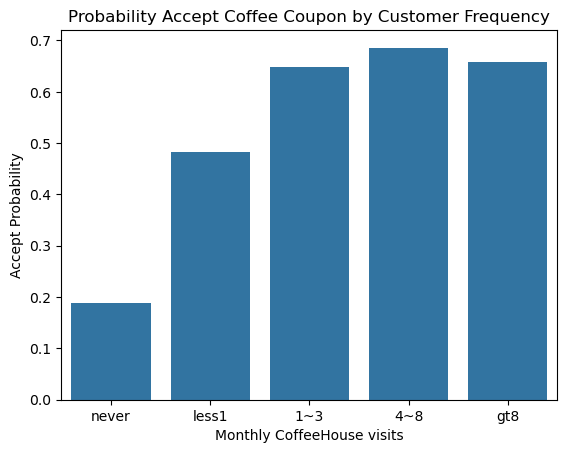

In [44]:
sns.barplot(x='CoffeeHouse', y='Y', data=freq_plotdata)
plt.title("Probability Accept Coffee Coupon by Customer Frequency")
plt.xlabel('Monthly CoffeeHouse visits')  # X-axis label
plt.ylabel('Accept Probability')  # Y-axis label

plt.show
plt.savefig('images/barplot_freq.png')

In [45]:
## First create the ordinal order of education
ordinal_order = pd.DataFrame(['Some High School', 'High School Graduate', 'Some college - no degree','Associates degree', 'Bachelors degree',
 'Graduate degree (Masters or Doctorate)'])

ordinal_order.columns = ['educ']
ordinal_order

,educ
0,Some High School
1,High School Graduate
2,Some college - no degree
3,Associates degree
4,Bachelors degree
5,Graduate degree (Masters or Doctorate)


In [46]:
## Find probabilty of acceptance by Education
edu_plotdata = data_coffee.groupby(['education'])[['Y']].mean().reset_index()

## Add ordinal order as a column and sort by it, so goes from low to high
for index, row in ordinal_order.iterrows():
    edu_plotdata.loc[edu_plotdata['education'] == row['educ'],'edu_ordinal'] = index 
edu_plotdata = edu_plotdata.sort_values(by='edu_ordinal')

print(edu_plotdata)

                                education         Y  edu_ordinal
4                        Some High School  0.607143          0.0
3                    High School Graduate  0.538182          1.0
5                Some college - no degree  0.519586          2.0
0                       Associates degree  0.517647          3.0
1                        Bachelors degree  0.460615          4.0
2  Graduate degree (Masters or Doctorate)  0.510924          5.0


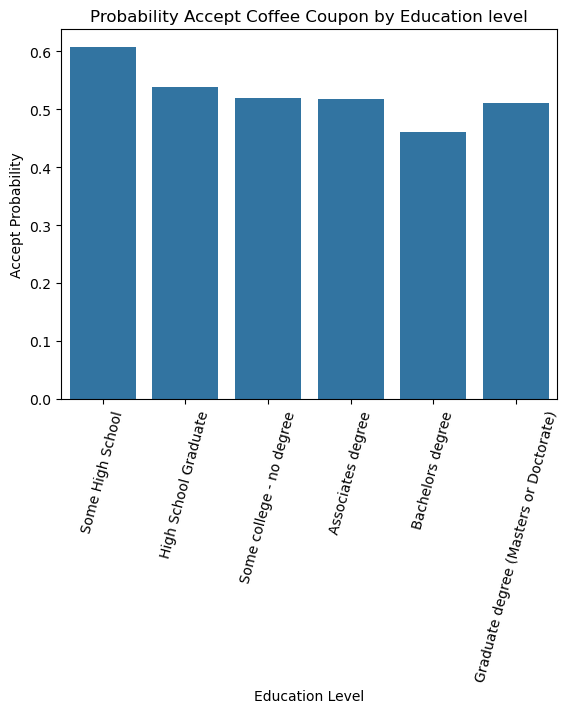

In [47]:
sns.barplot(x='education', y='Y', data=edu_plotdata)
plt.title("Probability Accept Coffee Coupon by Education level")
plt.xlabel('Education Level')  # X-axis label
plt.ylabel('Accept Probability')  # Y-axis label
plt.xticks(rotation=75)

plt.show()

In [48]:
## First create the ordinal order of age
ordinal_order = pd.DataFrame(['below21','21','26','31','36','41','46','50plus'])

ordinal_order.columns = ['age']
ordinal_order

,age
0,below21
1,21
2,26
3,31
4,36
5,41
6,46
7,50plus


In [49]:
## Find probabilty of acceptance by Age
age_plotdata = data_coffee.groupby(['age'])[['Y']].mean().reset_index()

## Add ordinal order as a column and sort by it, so goes from low to high
for index, row in ordinal_order.iterrows():
    age_plotdata.loc[age_plotdata['age'] == row['age'],'age_ordinal'] = index 
age_plotdata = age_plotdata.sort_values(by='age_ordinal')

print(age_plotdata)

       age         Y  age_ordinal
7  below21  0.696774          0.0
0       21  0.523322          1.0
1       26  0.516129          2.0
2       31  0.482927          3.0
3       36  0.470437          4.0
4       41  0.498452          5.0
5       46  0.513636          6.0
6   50plus  0.417132          7.0


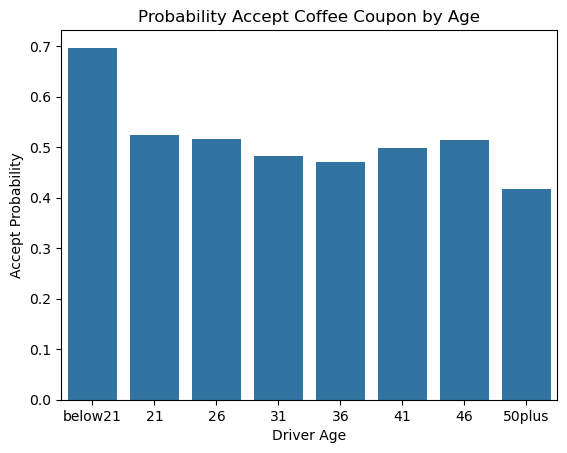

<Figure size 640x480 with 0 Axes>

In [50]:
sns.barplot(x='age', y='Y', data=age_plotdata)
plt.title("Probability Accept Coffee Coupon by Age")
plt.xlabel('Driver Age')  # X-axis label
plt.ylabel('Accept Probability')  # Y-axis label

plt.show()
plt.savefig('images/barplot_age.png')

In [51]:
## Find probabilty of acceptance by Coupon Expiry
time_plotdata = data_coffee.groupby(['expiration'])[['Y']].mean().reset_index()
time_plotdata = time_plotdata.iloc[::-1]
print(time_plotdata)

  expiration         Y
1         2h  0.432432
0         1d  0.584721


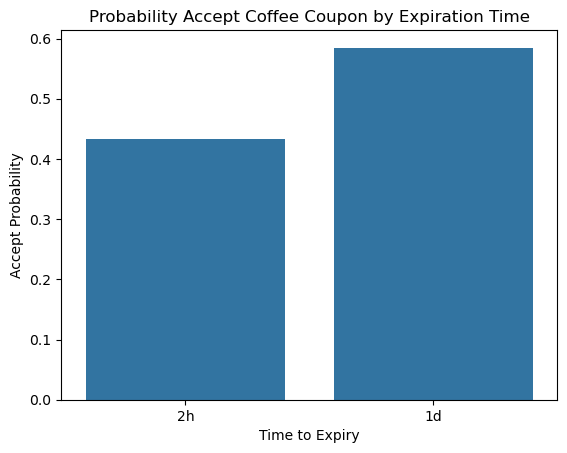

<Figure size 640x480 with 0 Axes>

In [52]:
sns.barplot(x='expiration', y='Y', data=time_plotdata)
plt.title("Probability Accept Coffee Coupon by Expiration Time")
plt.xlabel('Time to Expiry')  # X-axis label
plt.ylabel('Accept Probability')  # Y-axis label

plt.show()
plt.savefig('images/barplot_exp.png')

In [53]:
## First create the ordinal order of time of day
ordinal_order = pd.DataFrame([ '7AM','10AM','2PM' ,'6PM','10PM'])

ordinal_order.columns = ['timeofday']
ordinal_order

,timeofday
0,7AM
1,10AM
2,2PM
3,6PM
4,10PM


In [54]:
## Find probabilty of acceptance by Time of Day
time_plotdata = data_coffee.groupby(['time'])[['Y']].mean().reset_index()

## Add ordinal order as a column and sort by it, so goes from low to high
for index, row in ordinal_order.iterrows():
    time_plotdata.loc[time_plotdata['time'] == row['timeofday'],'time_ordinal'] = index 
time_plotdata = time_plotdata.sort_values(by='time_ordinal')

print(time_plotdata)

   time         Y  time_ordinal
4   7AM  0.445676           0.0
0  10AM  0.639456           1.0
2   2PM  0.549422           2.0
3   6PM  0.413471           3.0
1  10PM  0.431507           4.0


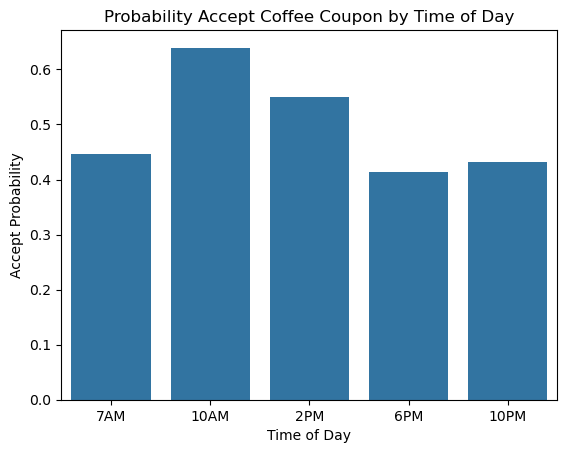

<Figure size 640x480 with 0 Axes>

In [55]:
sns.barplot(x='time', y='Y', data=time_plotdata)
plt.title("Probability Accept Coffee Coupon by Time of Day")
plt.xlabel('Time of Day')  # X-axis label
plt.ylabel('Accept Probability')  # Y-axis label

plt.show()
plt.savefig('images/barplot_timeofday.png')

In [56]:
## Find probabilty of acceptance by Destination
dest_plotdata = data_coffee.groupby(['destination'])[['Y']].mean().reset_index()
dest_plotdata = dest_plotdata.sort_values(by='Y')


print(dest_plotdata)

       destination         Y
0             Home  0.364435
2             Work  0.445676
1  No Urgent Place  0.581715


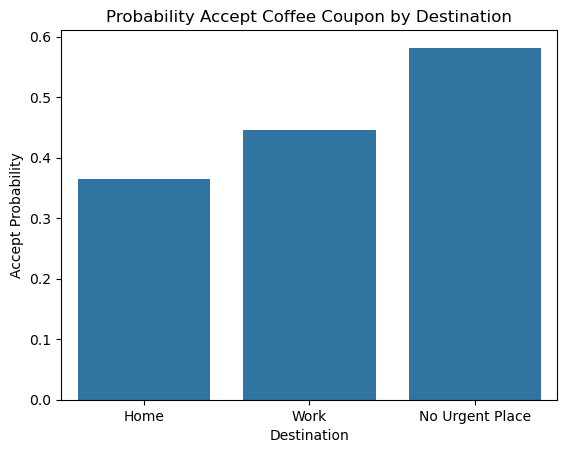

<Figure size 640x480 with 0 Axes>

In [57]:
sns.barplot(x='destination', y='Y', data=dest_plotdata)
plt.title("Probability Accept Coffee Coupon by Destination")
plt.xlabel('Destination')  # X-axis label
plt.ylabel('Accept Probability')  # Y-axis label

plt.show()
plt.savefig('images/barplot_dest.png')

In [58]:
## Find probabilty of acceptance by Passenger Type
pass_plotdata = data_coffee.groupby(['passanger'])[['Y']].mean().reset_index()
pass_plotdata = pass_plotdata.sort_values(by='Y')


print(pass_plotdata)

   passanger         Y
0      Alone  0.438091
2     Kid(s)  0.482759
3    Partner  0.572881
1  Friend(s)  0.599170


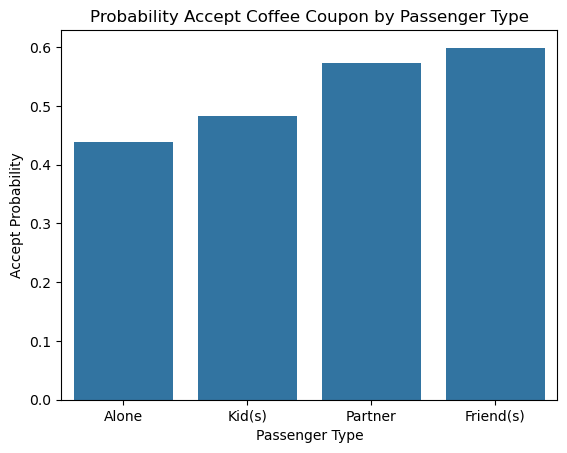

<Figure size 640x480 with 0 Axes>

In [59]:
sns.barplot(x='passanger', y='Y', data=pass_plotdata)
plt.title("Probability Accept Coffee Coupon by Passenger Type")
plt.xlabel('Passenger Type')  # X-axis label
plt.ylabel('Accept Probability')  # Y-axis label

plt.show()
plt.savefig('images/barplot_pass.png')


### Coffee House Analysis Description

For Coffee House coupons, determine which user and trip attributes are associated with accepting vs rejecting the offer.  Translate those differences into actionable targeting and offer-design suggestions.

### Key Data Analysis Findings 

Top Drivers of Coffee House coupon acceptance:

##### 1 - Time of Day

* 10AM has acceptance rate of 63.9%
* 6PM has acceptance rate of only 41.3%
* Difference of 22.6%

Interestingly, 10AM is higher than the start of day commute time of 7AM. Possibly drivers are too rushed to get to school/work to take advantage of coupons during rush hour. However, 10AM may represent a natural mid-morning break or "second coffee" ritual.  

##### 2 - Prior CoffeeHouse frequency

* Drivers with monthly visits from 4-8 had 68.6% acceptance
* Drivers who never visit had only 18.9%
* Difference of 49.7%

Naturally, drivers who are already established clients of CoffeeHouses will be more attracted to a coupon as opposed to drivers who never visit and may only respond for novelty or price motivations.

##### 3 - Expiration

* If the coupon has 1day until expiration, the acceptance rate is 58.4%
* However, if only 2hours until expiry is offered, the acceptance is only 43.2
* Difference of 15.2%

The longer the offer is valid, the more likely the drivers are to take advantage.  A 2 hour time limit may be too short to allow for personal time conflicts that may not allow the driver to take immediate action on the coupon. 

##### 4 - Destination

* When the destination is No Urgent Place, the acceptance rate is 58.1%
* Whereas, when the destination is Home, the acceptance rate is 36.4%
* Difference of 21.7%

Drivers respond to the coupon offer more frequently when there is no competing urgent destination.  In such contexts, the driver can afford the time to take an unplanned trip to the coffee house.

##### 5 - Passenger Type

* When the driver is travelling with Friends, the acceptance rate is nearly 60%
* When the driver is alone, the rate is only 43.8%
* Difference of 16.2%

When with friends, the detour may be reframed as a shared journey or an opportunity to hang out longer, than an inconvenience or hassle.  Drivers may be more willing to act on a deal when they know it creates shared value with a friend (e.g., “buy-one-get-one” or multiple drinks).

##### 6 - Age

* For drivers below 21, the acceptance rate is 69.7%
* For drivers 50 or over, the rate is only 41.7%
* Difference of 28.0%

Very young drivers had notably higher rates of acceptance.  It's possible that younger drivers, who may be just starting their careers or are still students, are more price sensitive and therefore more responsive to coupon offers.

### Next Step Recommendations

##### Propensity audience: 

* Build a Coffee House likelihood score (features above + recent visits) and allocate budget toward top deciles.

* Create a Student Loyalty Card to drive offers to younger drivers. Partner with student orgs/clubs to distribute coupons at events.

##### Contextual triggers:

* Time: Focus on 10AM (plus adjacent hours), test a late-morning block. Prioritize delivery when users aren’t headed somewhere time-critical (e.g., midday errands).

* Destination: Prefer “no urgent place” contexts; downweight evening commutes home. 

* Companions: Boost bids when with friends (proxied by weekend daytime, multi-device co-location, or car occupancy signals if available).

##### Offer design:

* Expiration: Standardize Coffee House coupons at same-day/24h rather than 2-hour windows.

* Creative: “Grab a coffee with friends” framing; “Good all day today” hook.


